In [1]:
import numpy as np

In [2]:
f = open('Iris.csv', 'r')
lines = f.readlines()

In [3]:
cats = ['Iris-setosa' ,'Iris-versicolor','Iris-virginica']
X = list()
Y = list()
for line in lines[1:]:
    _,sl,sw,pl,pw,sp = line[:-1].split(',')
    sl = float(sl)
    sw = float(sw)
    pl = float(pl)
    pw = float(pw)
    sp = [1.0 if sp == cat else 0.0 for cat in cats]
    X.append([sl,sw,pl,pw])
    Y.append(sp)

In [4]:
total = len(X)
indexes = list(range(total))
np.random.shuffle(indexes)
Xs = [X[i] for i in indexes]
Ys = [Y[i] for i in indexes]

In [5]:
Xs = np.array(Xs)
Ys = np.array(Ys)

In [6]:
sep = int(total * 0.1)
total_test = sep
total_train = total - sep

Xtrain = Xs[:total_train,:]
Ytrain = Ys[:total_train,:]

Xtest = Xs[total_train:,:]
Ytest = Ys[total_train:,:]

In [7]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

class Perceptron:
    def __init__(self):
        self.Wh = np.random.random((8,4)) * 2.0 - 1.0
        self.bh = np.random.random((8,1)) * 2.0 - 1.0
        self.Wo = np.random.random((3,8)) * 2.0 - 1.0
        self.bo = np.random.random((3,1)) * 2.0 - 1.0
        self.eta = 0.01
    
    def forward(self,x):
        x = np.reshape(x,(4,1))
        self.sh = np.dot(self.Wh,x) + self.bh
        self.zh = sigmoid(self.sh)
        self.so = np.dot(self.Wo,self.zh) + self.bo
        self.zo = sigmoid(self.so)
        return self.zo
    
    def backprop(self,X,Y):
        Err = 0.0
        total = X.shape[0]
        for i in range(total):
            x = X[i,:]
            x = np.reshape(x,(4,1))
            y_hat = Y[i,:]
            y_hat = np.reshape(y_hat,(3,1))
            y = self.forward(x)
            err = (np.sum((y - y_hat) ** 2)) / 2.0
            Err+= err
            
            self.delta_output = (y - y_hat) * self.zo * (1 - self.zo)
            self.delta_hidden = np.dot(self.Wo.T,self.delta_output) * self.zh * (1 - self.zh)
            
            self.Wo -= self.eta * np.dot(self.delta_output, self.zh.T)
            self.bo -= self.eta * self.delta_output
            
            self.Wh -= self.eta * np.dot(self.delta_hidden, x.T)
            self.bh -= self.eta * self.delta_hidden
    
        Err /= total
        return Err

In [9]:
p = Perceptron()
Err = list()
for i in range(10000):
    Err.append(p.backprop(Xtrain,Ytrain))
    if not (i % 1000) or i == 0:
        print('Err =' ,Err[-1])

Err = 0.44309991375517943
Err = 0.02553468785177147
Err = 0.020087617882265728
Err = 0.018230785969027143
Err = 0.017216968840409564
Err = 0.016560402468204956
Err = 0.016088577275495643
Err = 0.015722256473539573
Err = 0.015420299268995975
Err = 0.015159567708240401


In [10]:
Err = np.array(Err)
from matplotlib import pyplot as plt

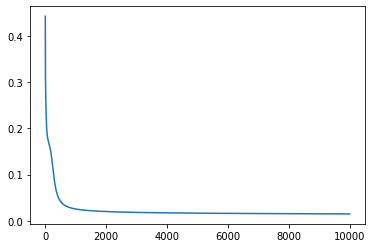

In [11]:
plt.plot(Err)

In [15]:
np.set_printoptions(formatter={'float':lambda x: '%+01.2f ' % x})

for i in range(total_test):
    y = p.forward(Xtest[i,:])
    y_hat = Ytest[i,:]
    print(y_hat, y.T[0])

[+0.00  +0.00  +1.00 ] [+0.00  +0.05  +0.98 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.03  +0.99 ]
[+1.00  +0.00  +0.00 ] [+0.98  +0.02  +0.00 ]
[+1.00  +0.00  +0.00 ] [+0.98  +0.02  +0.00 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.05  +0.94 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.03  +0.99 ]
[+0.00  +1.00  +0.00 ] [+0.02  +0.99  +0.00 ]
[+0.00  +1.00  +0.00 ] [+0.02  +0.99  +0.00 ]
[+1.00  +0.00  +0.00 ] [+0.98  +0.02  +0.00 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.05  +0.96 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.38  +0.61 ]
[+1.00  +0.00  +0.00 ] [+0.98  +0.02  +0.00 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.02  +0.99 ]
[+0.00  +0.00  +1.00 ] [+0.00  +0.39  +0.61 ]
[+0.00  +1.00  +0.00 ] [+0.02  +0.99  +0.00 ]
